In [4]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister
from qiskit.visualization import *

In [5]:
from qiskit import ClassicalRegister

In [6]:
def entangle(qc:QuantumCircuit, q0, q1):
    qc.h(q0)
    qc.cx(q0,q1)
    return

def untangle(qc:QuantumCircuit, q0, q1):
    qc.cx(q0,q1)
    qc.h(q0)
    return

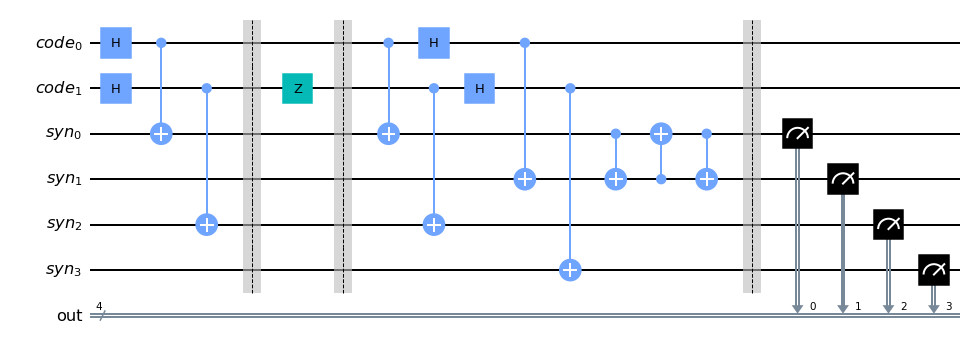

In [26]:
code = QuantumRegister(2,"code")
syn = QuantumRegister(4,"syn")
out = ClassicalRegister(4,"out")

qc_init = QuantumCircuit(code, syn,out)

qc_init.h(code[0])
qc_init.cx(code[0],syn[0])

qc_init.h(code[1])
qc_init.cx(code[1],syn[2])

qc_init.barrier()

# apply error
qc_error = QuantumCircuit(code, syn, out)
qc_error.z(code[1])

qc_error.barrier()
# apply error end

qc_syn = QuantumCircuit(code,syn,out)
qc_syn.cx(code[0],syn[0])
qc_syn.h(code[0])

qc_syn.cx(code[0],syn[1])
qc_syn.cx(syn[0],syn[1])
qc_syn.cx(syn[1],syn[0])
qc_syn.cx(syn[0],syn[1])

qc_syn.cx(code[1],syn[2])
qc_syn.h(code[1])

qc_syn.cx(code[1],syn[3])
# qc_syn.cx(syn[2],syn[3])
# qc_syn.cx(syn[3],syn[2])

qc_syn.barrier()
qc_syn.measure(syn, out)

qc = qc_init.compose(qc_error).compose(qc_syn)

qc.draw("mpl")


In [27]:
counts = execute(qc, Aer.get_backend("qasm_simulator"),shots=1024).result().get_counts()
counts

{'1000': 1024}